<a href="https://colab.research.google.com/github/AadityaPanchakshikar/Technical-Analysis-w-py/blob/main/MACD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Moving Average Convergence and Divergence (MACD)

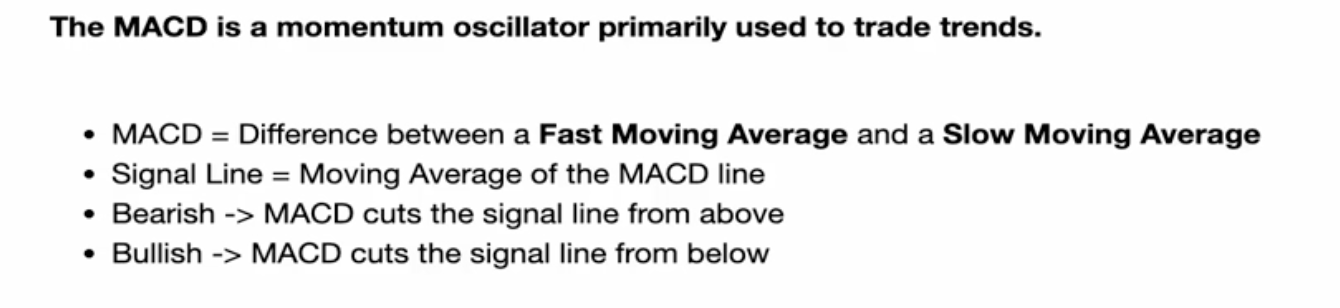

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Trading/Data/SampleNiftyData.csv'
df = pd.read_csv(file_path, parse_dates=["date"], index_col="date")
df[['close']].head()

In [ ]:
def MACD(data, fast_ma_period, slow_ma_period, signal_period):
    data["FMA"] = data['close'].ewm(span=fast_ma_period).mean()
    data["SMA"] = data['close'].ewm(span=slow_ma_period).mean()
    data["MACD"] = data["FMA"] - data["SMA"]
    data["Signal"] = data['MACD'].ewm(span=signal_period).mean()
    return data

In [ ]:
fast = 12
slow = 26
signal = 9
df_MACD = MACD(df, fast, slow, signal)
df_MACD[["close", "MACD", "Signal"]].tail()

In [ ]:
data2020 = df_MACD[["MACD", "Signal", 'close']].loc["2020"]
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(18, 12))
ax1.plot(data2020[['MACD']], label='MACD')
ax1.plot(data2020[['Signal']], label='Signal')
ax1.legend(loc="upper left")
ax2.plot(data2020[['close']], label='close')
ax2.legend(loc="upper left")